# <center>Telecom Churn

## Importing

In [2]:
#Essentials
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,\
roc_curve, precision_score, recall_score, f1_score
import statsmodels.api as sm

NOTE : I also have another notebook attached, naming 'Rough Work', which contains steps which led me to this final notebook<br>
 If you have time you can have a look at that too.<br>
    Thank you.<br>
    Carry on please

## Import Data and Visulization

### 1. Import Data

In [3]:
# import data dictionary
ddict = pd.read_csv('data_dictionary.csv')

In [4]:
ddict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [5]:
#Import data
churn = pd.read_csv('train.csv')
churn.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
5,5,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,86.193,83.351,...,0,0,NaN,NaN,NaN,698,0.00,0.00,0.00,0
6,6,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,54.173,95.130,...,0,0,NaN,NaN,NaN,1083,0.00,0.00,0.00,0
7,7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,167.861,167.869,...,0,0,1.0,1.0,1.0,584,82.26,73.56,177.14,0
8,8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,163.550,90.250,...,0,0,NaN,NaN,NaN,2455,0.00,0.00,0.00,1
9,9,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,101.984,259.265,...,0,0,NaN,NaN,NaN,2530,0.00,0.00,0.00,0


In [6]:
churn.shape

(69999, 172)

In [7]:
churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [9]:
#Lets look at object columns
obj_col= churn.select_dtypes(include=['object']).columns
# churn[obj_col]
for i in range(len(obj_col)):
    churn[obj_col[i]] = pd.to_datetime(churn[obj_col[i]])
churn[obj_col]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-22,2014-07-10,2014-08-24,NaT,NaT,NaT
1,2014-06-30,2014-07-31,2014-08-31,2014-06-12,2014-07-10,2014-08-26,NaT,2014-07-08,NaT
2,2014-06-30,2014-07-31,2014-08-31,2014-06-11,2014-07-22,2014-08-24,NaT,NaT,NaT
3,2014-06-30,2014-07-31,2014-08-31,2014-06-15,2014-07-21,2014-08-25,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-26,2014-08-30,2014-06-25,2014-07-23,2014-08-20
...,...,...,...,...,...,...,...,...,...
69994,2014-06-30,2014-07-31,2014-08-31,2014-06-18,2014-07-31,2014-08-31,NaT,2014-07-31,2014-08-21
69995,2014-06-30,2014-07-31,2014-08-31,2014-06-28,2014-07-31,2014-08-27,NaT,NaT,NaT
69996,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-30,2014-08-29,NaT,NaT,NaT
69997,2014-06-30,2014-07-31,2014-08-31,2014-06-29,2014-07-19,2014-08-26,2014-06-17,2014-07-13,2014-08-14


In [10]:
# All Column details
def col_details(df):
    for ind, item in enumerate(df.columns):
        print(f'{ind} : {item}, {type(item)}')

In [11]:
col_details(churn)

0 : id, <class 'str'>
1 : circle_id, <class 'str'>
2 : loc_og_t2o_mou, <class 'str'>
3 : std_og_t2o_mou, <class 'str'>
4 : loc_ic_t2o_mou, <class 'str'>
5 : last_date_of_month_6, <class 'str'>
6 : last_date_of_month_7, <class 'str'>
7 : last_date_of_month_8, <class 'str'>
8 : arpu_6, <class 'str'>
9 : arpu_7, <class 'str'>
10 : arpu_8, <class 'str'>
11 : onnet_mou_6, <class 'str'>
12 : onnet_mou_7, <class 'str'>
13 : onnet_mou_8, <class 'str'>
14 : offnet_mou_6, <class 'str'>
15 : offnet_mou_7, <class 'str'>
16 : offnet_mou_8, <class 'str'>
17 : roam_ic_mou_6, <class 'str'>
18 : roam_ic_mou_7, <class 'str'>
19 : roam_ic_mou_8, <class 'str'>
20 : roam_og_mou_6, <class 'str'>
21 : roam_og_mou_7, <class 'str'>
22 : roam_og_mou_8, <class 'str'>
23 : loc_og_t2t_mou_6, <class 'str'>
24 : loc_og_t2t_mou_7, <class 'str'>
25 : loc_og_t2t_mou_8, <class 'str'>
26 : loc_og_t2m_mou_6, <class 'str'>
27 : loc_og_t2m_mou_7, <class 'str'>
28 : loc_og_t2m_mou_8, <class 'str'>
29 : loc_og_t2f_mou_6, <cla

<AxesSubplot:xlabel='arpu_6', ylabel='Count'>

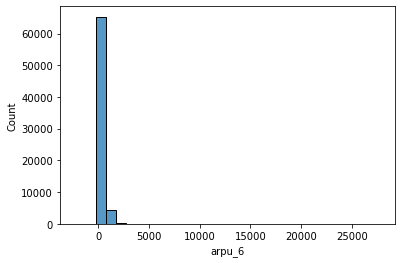

In [12]:
sns.histplot(churn.arpu_6, bins=30)

<AxesSubplot:xlabel='arpu_7', ylabel='Count'>

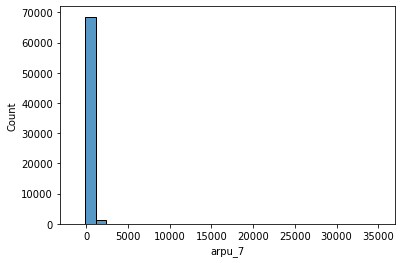

In [13]:
sns.histplot(churn.arpu_7, bins=30)

<AxesSubplot:xlabel='arpu_8', ylabel='Count'>

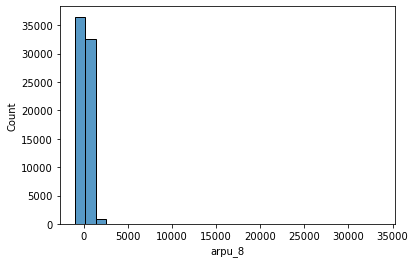

In [14]:
sns.histplot(churn.arpu_8, bins=30)

## Clean Data

Best i could derive from the dates column is to convert these columns into whether the recharge/data recharge is done or not in that month.

Such that:
   * 1 : Recharge done in that month
   * 0 : Recharge not done in that month

In [15]:
#Mapping
churn['Rech_6'] = churn['date_of_last_rech_6'].fillna(0).map(lambda x : 1 if x!=0 else 0)
churn['Rech_data_6'] = churn['date_of_last_rech_data_6'].fillna(0).map(lambda x : 1 if x!=0 else 0)
churn['Rech_7'] = churn['date_of_last_rech_7'].fillna(0).map(lambda x : 1 if x!=0 else 0)
churn['Rech_data_7'] = churn['date_of_last_rech_data_7'].fillna(0).map(lambda x : 1 if x!=0 else 0)
churn['Rech_8'] = churn['date_of_last_rech_8'].fillna(0).map(lambda x : 1 if x!=0 else 0)
churn['Rech_data_8'] = churn['date_of_last_rech_data_8'].fillna(0).map(lambda x : 1 if x!=0 else 0)
churn.drop(obj_col, axis=1, inplace=True)
churn[['Rech_6', 'Rech_data_6', 'Rech_7', 'Rech_data_7', 'Rech_8', 'Rech_data_8']]

,Rech_6,Rech_data_6,Rech_7,Rech_data_7,Rech_8,Rech_data_8
0,1,0,1,0,1,0
1,1,0,1,1,1,0
2,1,0,1,0,1,0
3,1,0,1,0,1,0
4,1,1,1,1,1,1
...,...,...,...,...,...,...
69994,1,0,1,1,1,1
69995,1,0,1,0,1,0
69996,1,0,1,0,1,0
69997,1,1,1,1,1,1


In [16]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 169 entries, id to Rech_data_8
dtypes: float64(135), int64(34)
memory usage: 90.3 MB


In [17]:
#Functions to check percentage of Null values and Zeros in columns

import pandas.api.types as typ
#Null Values

def nulls(df, perc): #datafram, precentage to display
    null_cols = []
    tot = 69999
    for i in df.columns:
        nulls = df[i].isna().sum()
        if (nulls/tot)*100 > perc:
            null_cols.append(i)
            print(f'{i} : {round((nulls/tot)*100, 2)}%')
    return null_cols  #returns list of columns

#Zero Values
def zeros(df, perc): #datafram, precentage to display
    zero_cols = []
    tot = 69999
    for i in df.columns:
        if typ.is_numeric_dtype(df[i]):
            z = (df[i] == 0).sum()
            if (z/tot)*100 > perc:
                zero_cols.append(i)
                print(f'{i} : {round((z/tot)*100)}%')
    return zero_cols  #returns list of columns

In [18]:
len(churn.columns)

169

In [19]:
#Null values
null_cols = nulls(churn, 70)

total_rech_data_6 : 74.9%
total_rech_data_7 : 74.48%
total_rech_data_8 : 73.69%
max_rech_data_6 : 74.9%
max_rech_data_7 : 74.48%
max_rech_data_8 : 73.69%
count_rech_2g_6 : 74.9%
count_rech_2g_7 : 74.48%
count_rech_2g_8 : 73.69%
count_rech_3g_6 : 74.9%
count_rech_3g_7 : 74.48%
count_rech_3g_8 : 73.69%
av_rech_amt_data_6 : 74.9%
av_rech_amt_data_7 : 74.48%
av_rech_amt_data_8 : 73.69%
arpu_3g_6 : 74.9%
arpu_3g_7 : 74.48%
arpu_3g_8 : 73.69%
arpu_2g_6 : 74.9%
arpu_2g_7 : 74.48%
arpu_2g_8 : 73.69%
night_pck_user_6 : 74.9%
night_pck_user_7 : 74.48%
night_pck_user_8 : 73.69%
fb_user_6 : 74.9%
fb_user_7 : 74.48%
fb_user_8 : 73.69%


In [20]:
#Zeros
zero_cols = zeros(churn, 90)

loc_og_t2o_mou : 99%
std_og_t2o_mou : 99%
loc_ic_t2o_mou : 99%
std_og_t2c_mou_6 : 96%
std_og_t2c_mou_7 : 96%
std_og_t2c_mou_8 : 95%
isd_og_mou_6 : 91%
isd_og_mou_7 : 92%
isd_og_mou_8 : 91%
og_others_7 : 96%
og_others_8 : 94%
std_ic_t2o_mou_6 : 96%
std_ic_t2o_mou_7 : 96%
std_ic_t2o_mou_8 : 95%
monthly_2g_6 : 93%
monthly_2g_7 : 92%
monthly_2g_8 : 93%
monthly_3g_6 : 94%
monthly_3g_7 : 94%
monthly_3g_8 : 94%
sachet_3g_6 : 96%
sachet_3g_7 : 96%
sachet_3g_8 : 96%


* There are few columns that have more than 50% null values, and many columns that have more than 50% zeros present.
* But i will be dropping columns for null only and fill rest of the Nan values with zero.
* And will only drop columns with more than 90% of zeros, as PCA will handle rest of missing values by itself.

In [21]:
len(null_cols)

27

In [22]:
#Dropping columns for null values > 50%
clean_churn = churn.drop(null_cols, axis = 1)

In [23]:
#Lets drop columns with more tha 90% zeros
zero_cols = zeros(clean_churn, 90)
# len(zero_cols)
clean_churn = clean_churn.drop(zero_cols, axis=1)

loc_og_t2o_mou : 99%
std_og_t2o_mou : 99%
loc_ic_t2o_mou : 99%
std_og_t2c_mou_6 : 96%
std_og_t2c_mou_7 : 96%
std_og_t2c_mou_8 : 95%
isd_og_mou_6 : 91%
isd_og_mou_7 : 92%
isd_og_mou_8 : 91%
og_others_7 : 96%
og_others_8 : 94%
std_ic_t2o_mou_6 : 96%
std_ic_t2o_mou_7 : 96%
std_ic_t2o_mou_8 : 95%
monthly_2g_6 : 93%
monthly_2g_7 : 92%
monthly_2g_8 : 93%
monthly_3g_6 : 94%
monthly_3g_7 : 94%
monthly_3g_8 : 94%
sachet_3g_6 : 96%
sachet_3g_7 : 96%
sachet_3g_8 : 96%


In [24]:
#Fill rest of the NaN values
clean_churn = clean_churn.fillna(0)

In [25]:
clean_churn.isna().sum().sum()

0

In [26]:
counts = clean_churn['churn_probability'].value_counts()
class_perc = counts/len(clean_churn)*100
print(class_perc)

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64


In [27]:
len(clean_churn.columns)

119

In [28]:
clean_churn['circle_id'].value_counts()

109    69999
Name: circle_id, dtype: int64

## Modelling

### 1. Preparing Data

In [29]:
# X & y
X = clean_churn.drop(['churn_probability', 'id', 'circle_id'], axis=1)
y = clean_churn['churn_probability']

In [30]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = [X.columns]
X_scaled

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Rech_6,Rech_data_6,Rech_7,Rech_data_7,Rech_8,Rech_data_8
0,-0.753587,-0.555159,-0.771000,-0.268737,-0.014281,-0.408716,-0.507419,-0.291706,-0.577219,-0.166712,...,0.774197,-0.252885,-0.246124,-0.233557,0.126413,-0.578851,0.13396,-0.585384,0.190889,-0.597531
1,-0.847171,-0.451263,-0.670336,-0.433352,-0.420322,-0.412946,-0.610455,-0.513659,-0.487535,-0.166712,...,-0.536150,-0.252885,-0.246124,-0.233557,0.126413,-0.578851,0.13396,1.708280,0.190889,-0.597531
2,-0.665232,-0.508211,-0.792389,-0.431556,-0.368318,-0.412946,-0.437907,-0.337641,-0.584536,-0.166712,...,-0.355557,-0.252885,-0.246124,-0.233557,0.126413,-0.578851,0.13396,-0.585384,0.190889,-0.597531
3,-0.379318,-0.211770,-0.476708,-0.408751,-0.368057,-0.412946,-0.390704,-0.348850,-0.426804,-0.166712,...,-0.250562,-0.252885,-0.246124,-0.233557,0.126413,-0.578851,0.13396,-0.585384,0.190889,-0.597531
4,-0.126945,-0.435570,-0.503788,-0.361244,-0.404554,-0.392846,-0.428320,-0.475604,-0.554296,0.786712,...,-0.602297,-0.252885,-0.246124,-0.233557,0.126413,1.727559,0.13396,1.708280,0.190889,1.673554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-0.800015,0.385458,0.142865,-0.433352,-0.396295,-0.377108,-0.610455,0.938410,0.613888,0.099195,...,-1.049579,-0.252885,-0.246124,-0.233557,0.126413,-0.578851,0.13396,1.708280,0.190889,1.673554
69995,-0.368184,0.031778,-0.037187,-0.038453,0.221025,0.349805,-0.452161,-0.292961,-0.433618,-0.166712,...,-0.534050,-0.252885,-0.246124,-0.233557,0.126413,-0.578851,0.13396,-0.585384,0.190889,-0.597531
69996,0.266160,-0.057532,0.002623,-0.171995,-0.196898,-0.155755,0.461905,0.120426,0.243973,-0.166712,...,-0.358707,-0.252885,-0.246124,-0.233557,0.126413,-0.578851,0.13396,-0.585384,0.190889,-0.597531
69997,-0.133327,-0.095166,-0.380189,-0.385879,-0.395381,-0.390945,-0.513491,-0.542891,-0.545095,0.278717,...,-0.990782,2.213451,4.990812,3.618985,0.126413,1.727559,0.13396,1.708280,0.190889,1.673554


In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    train_size=0.7, 
                                                    random_state=100)

In [32]:
# 1. Lets have an insight using GLM for P-Values
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48882
Model Family:                Binomial   Df Model:                          116
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9733.5
Date:                Sat, 10 Jun 2023   Deviance:                       19467.
Time:                        23:27:36   Pearson chi2:                 2.40e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2326
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5843      0.153     16.858      0.000       2.284       2.885
arpu_6                 0.0008      0.000      3.183      0.001       0.000       0.001
arpu_7                 0.0009      0.000      4.046      0.000       0.000       0.001
arpu_8                 0.0007      0.000      2.426      0.015       0.000       0.001
onnet_mou_6           -0.0017      0.006     -0.294      0.769      -0.013       0.010
onnet_mou_7           -0.0026      0.003     -0.803      0.422      -0.009       0.004
onnet_mou_8           -0.0017      0.005     -0.376      0.707      -0.011       0.007
offnet_mou_6          -0.0015      0.006     -0.254      0.800      -0.013       0.010
offnet_mou_7          -0.0040      0.003     -1.283      0.199      -0.010       0.002
offnet_mou_8          -0.0027      0.004     -0.603      0.546      -0.012       0.006
roam_ic_mou_6          0.0011      0.000      3.270      0.001       0.000       0.002
roam_ic_mou_7          0.0005      0.000      1.137      0.256      -0.000       0.001
roam_ic_mou_8         -0.0006      0.000     -1.303      0.193      -0.001       0.000
roam_og_mou_6          0.0016      0.006      0.283      0.777      -0.010       0.013
roam_og_mou_7          0.0038      0.003      1.184      0.236      -0.002       0.010
roam_og_mou_8          0.0036      0.005      0.785      0.432      -0.005       0.012
loc_og_t2t_mou_6       8.2582      3.719      2.221      0.026       0.970      15.546
loc_og_t2t_mou_7      14.4637      3.874      3.734      0.000       6.871      22.056
loc_og_t2t_mou_8      48.4285      4.549     10.645      0.000      39.512      57.345
loc_og_t2m_mou_6       8.2571      3.719      2.221      0.026       0.969      15.545
loc_og_t2m_mou_7      14.4645      3.874      3.734      0.000       6.872      22.057
loc_og_t2m_mou_8      48.4306      4.549     10.646      0.000      39.514      57.347
loc_og_t2f_mou_6       8.2553      3.719      2.220      0.026       0.966      15.544
loc_og_t2f_mou_7      14.4727      3.874      3.736      0.000       6.880      22.066
loc_og_t2f_mou_8      48.4334      4.550     10.646      0.000      39.516      57.351
loc_og_t2c_mou_6      -0.0153      0.005     -2.884      0.004      -0.026      -0.005
loc_og_t2c_mou_7       0.0024      0.004      0.682      0.495      -0.005       0.009
loc_og_t2c_mou_8       0.0121      0.006      2.174      0.030       0.001       0.023
loc_og_mou_6          -8.2568      3.718     -2.220      0.026     -15.545      -0.969
loc_og_mou_7         -14.4626      3.874     -3.734      0.000     -22.055      -6.870
loc_og_mou_8         -48.4313      4.549    -10.646      0.000     -57.348     -39.515
std_og_t2t_mou_6      -5.1229      4.679     -1.095      0.274     -14.294       4.048
std_og_t2t_mou_7      -5.1409      5.1

There are many columns with high P-Value.<br>
First, lets use RFE to remove some columns

> ### RFE

In [33]:
# Using RFE with Logistic Regression model in GridSearchCV
logreg_rfe = LogisticRegression()
rfe = RFE(logreg_rfe, step=10)
params = {
    'n_features_to_select': [10,30,50,70,90,110,119]
}
rfe_gcv = GridSearchCV(estimator=rfe, param_grid=params, cv=5)

In [34]:
rfe_gcv.fit(X_train, y_train)
print(f'Best Estimators : {rfe_gcv.best_params_}')
print(f'Best Scores : {rfe_gcv.best_score_}')

Best Estimators : {'n_features_to_select': 30}
Best Scores : 0.9135493126120743


In [35]:
support = rfe_gcv.best_estimator_.support_
ranking = rfe_gcv.best_estimator_.ranking_
selected_features = [column for column, rank in zip(X.columns, ranking) if rank == 1]
len(selected_features)

30

In [36]:
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

<AxesSubplot:>

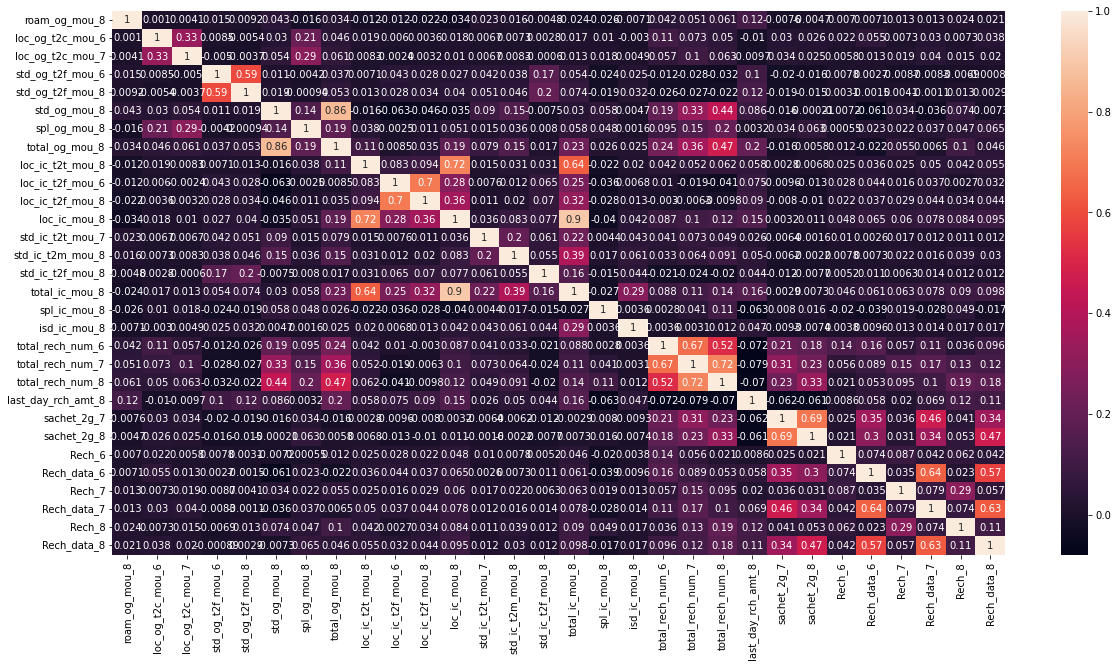

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe.corr(), annot=True)

In [38]:
#Rerun GLM
logm1 = sm.GLM(y_train, (sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48968
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10792.
Date:                Sat, 10 Jun 2023   Deviance:                       21584.
Time:                        23:30:48   Pearson chi2:                 6.82e+12
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1987
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1800      0.140     15.602      0.000       1.906       2.454
roam_og_mou_8          0.0028      0.000     13.431      0.000       0.002       0.003
loc_og_t2c_mou_6      -0.0143      0.005     -3.112      0.002      -0.023      -0.005
loc_og_t2c_mou_7       0.0058      0.003      2.119      0.034       0.000       0.011
std_og_t2f_mou_6      -0.0009      0.004     -0.219      0.826      -0.009       0.007
std_og_t2f_mou_8      -0.0143      0.008     -1.744      0.081      -0.030       0.002
std_og_mou_8           0.0037      0.000      8.714      0.000       0.003       0.005
spl_og_mou_8          -0.0074      0.003     -2.717      0.007      -0.013      -0.002
total_og_mou_8        -0.0038      0.000     -9.228      0.000      -0.005      -0.003
loc_ic_t2t_mou_8       0.0095      0.001      8.696      0.000       0.007       0.012
loc_ic_t2f_mou_6       0.0034      0.001      3.304      0.001       0.001       0.005
loc_ic_t2f_mou_8      -0.0148      0.003     -4.231      0.000      -0.022      -0.008
loc_ic_mou_8          -0.0077      0.001     -5.389      0.000      -0.011      -0.005
std_ic_t2t_mou_7       0.0038      0.001      7.534      0.000       0.003       0.005
std_ic_t2m_mou_8       0.0027      0.001      1.848      0.065      -0.000       0.005
std_ic_t2f_mou_8      -0.0170      0.007     -2.357      0.018      -0.031      -0.003
total_ic_mou_8        -0.0064      0.001     -5.161      0.000      -0.009      -0.004
spl_ic_mou_8          -7.2183      0.513    -14.066      0.000      -8.224      -6.213
isd_ic_mou_8           0.0075      0.001      5.655      0.000       0.005       0.010
total_rech_num_6       0.0339      0.003     10.947      0.000       0.028       0.040
total_rech_num_7       0.0345      0.004      8.145      0.000       0.026       0.043
total_rech_num_8      -0.1004      0.006    -15.891      0.000      -0.113      -0.088
last_day_rch_amt_8    -0.0053      0.000    -14.205      0.000      -0.006      -0.005
sachet_2g_7            0.0266      0.019      1.407      0.159      -0.010       0.064
sachet_2g_8           -0.1294      0.033     -3.898      0.000      -0.195      -0.064
Rech_6                -0.7036      0.111     -6.321      0.000      -0.922      -0.485
Rech_data_6            0.1613      0.054      2.975      0.003       0.055       0.267
Rech_7                -1.3153      0.096    -13.669      0.000      -1.504      -1.127
Rech_data_7           -0.0057      0.063     -0.091      0.927      -0.129       0.118
Rech_8                -0.8997      0.066    -13.596      0.000      -1.029      -0.770
Rech_data_8           -0.8113      0.075    -10.781      0.000      -0.959      -0.664
======================================================================================
"""

In [39]:
#Dropping columns with highest P-value
# X_train_glm = X_train_rfe.drop('Rech_data_7', axis = 1)
# X_train_glm = X_train_rfe.drop(['Rech_data_7', 'std_og_t2f_mou_6'], axis = 1)
X_train_glm = X_train_rfe.drop(['Rech_data_7', 'std_og_t2f_mou_6', 'sachet_2g_7'], axis = 1)
logm1 = sm.GLM(y_train, (sm.add_constant(X_train_glm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48971
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10793.
Date:                Sat, 10 Jun 2023   Deviance:                       21586.
Time:                        23:30:49   Pearson chi2:                 6.84e+12
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1987
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1789      0.140     15.597      0.000       1.905       2.453
roam_og_mou_8          0.0028      0.000     13.388      0.000       0.002       0.003
loc_og_t2c_mou_6      -0.0144      0.005     -3.125      0.002      -0.023      -0.005
loc_og_t2c_mou_7       0.0058      0.003      2.117      0.034       0.000       0.011
std_og_t2f_mou_8      -0.0150      0.008     -1.947      0.052      -0.030       0.000
std_og_mou_8           0.0037      0.000      8.711      0.000       0.003       0.005
spl_og_mou_8          -0.0075      0.003     -2.734      0.006      -0.013      -0.002
total_og_mou_8        -0.0038      0.000     -9.233      0.000      -0.005      -0.003
loc_ic_t2t_mou_8       0.0095      0.001      8.701      0.000       0.007       0.012
loc_ic_t2f_mou_6       0.0034      0.001      3.289      0.001       0.001       0.005
loc_ic_t2f_mou_8      -0.0148      0.003     -4.225      0.000      -0.022      -0.008
loc_ic_mou_8          -0.0078      0.001     -5.407      0.000      -0.011      -0.005
std_ic_t2t_mou_7       0.0038      0.001      7.493      0.000       0.003       0.005
std_ic_t2m_mou_8       0.0026      0.001      1.835      0.067      -0.000       0.005
std_ic_t2f_mou_8      -0.0171      0.007     -2.376      0.017      -0.031      -0.003
total_ic_mou_8        -0.0064      0.001     -5.144      0.000      -0.009      -0.004
spl_ic_mou_8          -7.2104      0.513    -14.057      0.000      -8.216      -6.205
isd_ic_mou_8           0.0075      0.001      5.635      0.000       0.005       0.010
total_rech_num_6       0.0338      0.003     10.935      0.000       0.028       0.040
total_rech_num_7       0.0360      0.004      8.817      0.000       0.028       0.044
total_rech_num_8      -0.1012      0.006    -16.095      0.000      -0.114      -0.089
last_day_rch_amt_8    -0.0053      0.000    -14.216      0.000      -0.006      -0.005
sachet_2g_8           -0.1063      0.029     -3.720      0.000      -0.162      -0.050
Rech_6                -0.7050      0.111     -6.334      0.000      -0.923      -0.487
Rech_data_6            0.1772      0.049      3.620      0.000       0.081       0.273
Rech_7                -1.3189      0.096    -13.738      0.000      -1.507      -1.131
Rech_8                -0.8967      0.066    -13.564      0.000      -1.026      -0.767
Rech_data_8           -0.8187      0.071    -11.519      0.000      -0.958      -0.679
======================================================================================
"""

In [40]:
len(X_train_glm.columns)

27

We've removed 3 more columns using P-value consideration and now finally have 27 variables

Now using Logistics Regression model to evaluate scores

> ### Logistic Regression

In [41]:
#Lets run LogisticsRegression now
logreg = LogisticRegression()
params = {
    'C':[0.1, 1, 10, 1e9]
}
log_gcv = GridSearchCV(estimator=logreg, param_grid=params, cv=5)
log_gcv.fit(X_train_glm, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 1000000000.0]})

In [42]:
print(f'Best Estimators : {log_gcv.best_params_}')
print(f'Best Scores : {log_gcv.best_score_}')

Best Estimators : {'C': 1000000000.0}
Best Scores : 0.9142228278187486


In [43]:
# Metric Function
def reg_scores(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)

    print(f'Accuracy: {round(accuracy*100, 2)}%')
    print(f'Precision: {round(precision*100, 2)}%')
    print(f'Recall: {round(recall*100, 2)}%')
    print(f'F1 Score: {round(f1score*100, 2)}%')

In [44]:
#Lets run Logreg for 1e9
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_glm, y_train)
X_test_lr = X_test[X_train_glm.columns]
y_pred = logreg.predict(X_test_lr)
reg_scores(y_test, y_pred)

Accuracy: 91.5%
Precision: 71.87%
Recall: 24.58%
F1 Score: 36.63%


Recall and F1 Score are lower because of imbalance in classes

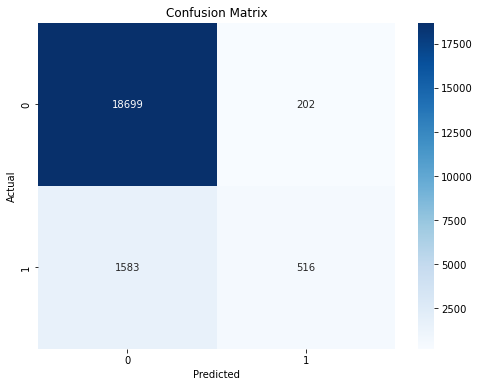

In [45]:
### Evaluate model before PCA
# Confusion matrix 
confusion = confusion_matrix( y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

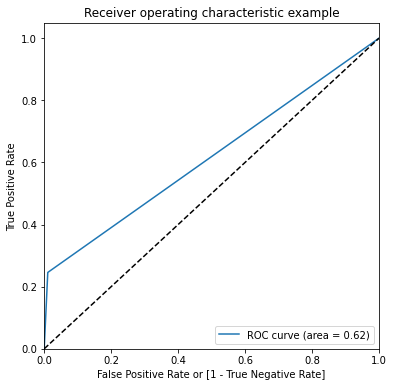

(array([0.        , 0.01068727, 1.        ]),
 array([0.        , 0.24583135, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [47]:
draw_roc(y_test, y_pred)

In [48]:
"{:2.2f}".format(roc_auc_score(y_test, y_pred))

'0.62'

Lets run PCA now

> ### PCA

In [49]:
X_train_pca = X_train_glm

In [50]:
pca = PCA(random_state=42)
pca.fit(X_train_pca, y_train)
pca.components_

array([[ 4.08916131e-03,  3.75542454e-04,  7.91294033e-04,
         6.01125769e-04,  6.20896300e-01,  4.98784347e-03,
         7.70449183e-01,  2.84908602e-02,  1.79975224e-04,
         2.04475131e-03,  7.52769033e-02,  8.89024916e-03,
         2.19660746e-02,  5.08126823e-04,  1.13485205e-01,
         8.90883906e-06,  3.62506785e-03,  2.70072193e-03,
         4.24215042e-03,  5.67325557e-03,  2.93128553e-02,
         1.06485834e-05,  1.76932856e-06, -2.32549485e-05,
         1.14581433e-05,  3.09491522e-05,  2.47888560e-05],
       [-6.37943379e-03,  1.60131910e-04, -1.22476544e-05,
         1.10913810e-03, -2.36855899e-01,  1.02383441e-03,
         1.47343179e-02,  2.64103924e-01,  2.77257752e-02,
         3.34650817e-02,  6.07606381e-01,  1.58551523e-02,
         4.26546644e-02,  5.06161665e-03,  7.06088780e-01,
        -1.77225638e-05,  2.85685793e-02,  7.35179957e-04,
         5.33669596e-04,  5.08819543e-04,  3.65935982e-02,
         3.55890300e-05,  1.53662583e-05,  8.56900818e-

In [51]:
pca.explained_variance_ratio_

array([6.28218977e-01, 2.55955387e-01, 3.77748334e-02, 2.40610504e-02,
       1.59607565e-02, 1.23140248e-02, 7.49922361e-03, 7.22425487e-03,
       4.67073440e-03, 3.51410721e-03, 7.67595778e-04, 7.61020580e-04,
       5.00330758e-04, 3.18520043e-04, 1.53077724e-04, 1.02324795e-04,
       9.93855956e-05, 4.34267096e-05, 3.65696070e-05, 1.97880608e-05,
       3.94263500e-06, 3.92632027e-07, 1.30405967e-07, 5.86144044e-08,
       3.64587876e-08, 2.66400266e-08, 2.39243651e-08])

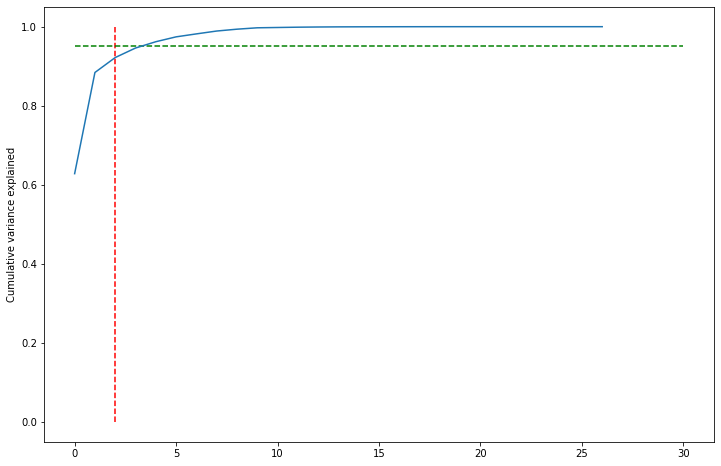

In [52]:
#scree plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=2, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

> ### Incremental PCA

* From above graph we see the skree plot having elbow curve at 1 variable.
* I will use GridsearchCV and pass 3-4 options to select principal component.

In [53]:
pipeline = Pipeline([
    ('ipca', IncrementalPCA()),
    ('logreg', LogisticRegression())
])
params = {
    'ipca__n_components':[1,2,3,7,10,20],
    'logreg__C' : [1e9]
}

In [54]:
pca_gcv = GridSearchCV(pipeline, param_grid=params, cv=5)
pca_gcv.fit(X_train_pca, y_train)
print(f'Best Parameters:{pca_gcv.best_params_}')
print(f'Best Score:{pca_gcv.best_score_}')

Best Parameters:{'ipca__n_components': 10, 'logreg__C': 1000000000.0}
Best Score:0.897406072256436


In [55]:
print(f'Estimator:{pca_gcv.best_estimator_}')

Estimator:Pipeline(steps=[('ipca', IncrementalPCA(n_components=10)),
                ('logreg', LogisticRegression(C=1000000000.0))])


Lets use IncrementalPCA with 10 variable as selected above

In [56]:
# X_train_ipca

NameError: name 'X_train_ipca' is not defined

In [57]:
ipca = IncrementalPCA(n_components=10)
X_train_ipca = ipca.fit_transform(X_train_pca)
# Apply logistic Regression after PCA
logreg_pca = LogisticRegression(C=1e9)
model_pca = logreg_pca.fit(X_train_ipca, y_train)
X_test_ipca = ipca.transform(X_test_lr)
#Predictions
y_pred_pca = model_pca.predict(X_test_ipca)
reg_scores(y_test, y_pred_pca)
# y_test_pca = y_test
# y_test_pca

Accuracy: 89.99%
Precision: 46.3%
Recall: 1.19%
F1 Score: 2.32%


In [58]:
selected_indices = ipca.components_.argsort()[-2:]
# Get the names of the selected columns
selected_columns = X_train_pca.columns[selected_indices]
print(selected_columns)

[['std_ic_t2m_mou_8' 'isd_ic_mou_8' 'loc_ic_mou_8' 'roam_og_mou_8'
  'std_og_mou_8' 'loc_ic_t2f_mou_8' 'loc_ic_t2f_mou_6' 'total_rech_num_8'
  'spl_og_mou_8' 'Rech_8' 'Rech_data_8' 'spl_ic_mou_8' 'Rech_data_6'
  'Rech_7' 'sachet_2g_8' 'Rech_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_6'
  'total_rech_num_6' 'last_day_rch_amt_8' 'total_rech_num_7'
  'std_og_t2f_mou_8' 'total_og_mou_8' 'loc_ic_t2t_mou_8'
  'std_ic_t2f_mou_8' 'total_ic_mou_8' 'std_ic_t2t_mou_7']
 ['loc_ic_mou_8' 'last_day_rch_amt_8' 'total_ic_mou_8' 'std_og_mou_8'
  'total_rech_num_8' 'total_rech_num_7' 'total_rech_num_6' 'spl_og_mou_8'
  'sachet_2g_8' 'Rech_8' 'spl_ic_mou_8' 'Rech_7' 'Rech_data_8' 'Rech_6'
  'Rech_data_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_6' 'std_og_t2f_mou_8'
  'roam_og_mou_8' 'std_ic_t2f_mou_8' 'total_og_mou_8' 'std_ic_t2t_mou_7'
  'std_ic_t2m_mou_8' 'isd_ic_mou_8' 'loc_ic_t2t_mou_8' 'loc_ic_t2f_mou_8'
  'loc_ic_t2f_mou_6']]


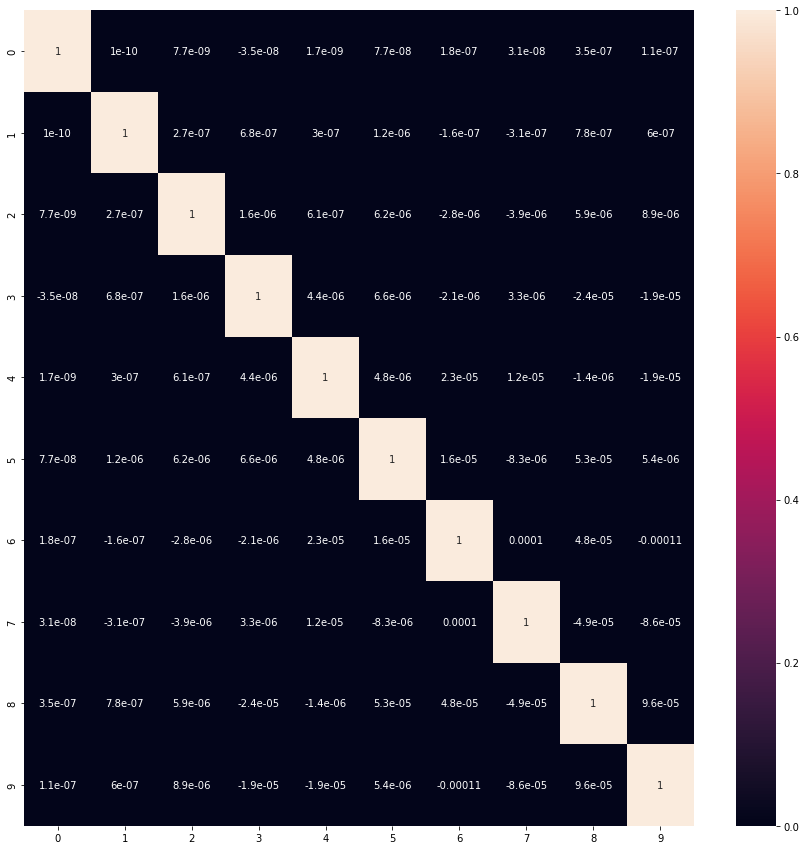

In [59]:
corr = np.corrcoef(X_train_ipca.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corr, annot=True);

In [60]:
X_test_ipca.shape

(21000, 10)

> ### PCA With Explained Variance

In [61]:
# PCA while explaining 90% of variance
pca_90 = PCA(0.9)
X_train_pcav = pca_90.fit_transform(X_train_pca)
X_train_pcav.shape

(48999, 3)

In [62]:
logreg_pcav = LogisticRegression()
model_pcav = logreg_pcav.fit(X_train_pcav, y_train)
X_test_pcav = pca_90.transform(X_test_lr)
y_pred_pcav = model_pcav.predict(X_test_pcav)
reg_scores(y_test,y_pred_pcav)

Accuracy: 90.0%
Precision: 0.0%
Recall: 0.0%
F1 Score: 0.0%


As we can see accuracy score is better but all other scores are '0', not even low.
Thus we will not use this evaluation

We have achieved 89% accuracy using 10 variables lets finalise this model.

In [63]:
ipca10 = IncrementalPCA(n_components=10)
X_train_ipca = ipca10.fit_transform(X_train_pca)
# Apply logistic Regression after PCA
logreg_pca = LogisticRegression(C=1e9)
model_pca = logreg_pca.fit(X_train_ipca, y_train)
X_test_ipca = ipca.transform(X_test_lr)
#Predictions
y_pred_pca = model_pca.predict(X_test_ipca)
reg_scores(y_test, y_pred_pca)

Accuracy: 89.99%
Precision: 46.3%
Recall: 1.19%
F1 Score: 2.32%


Now lets run this model on Test dataset provided.

> ### Test Data

In [64]:
churn_test = pd.read_csv('test.csv')
churn_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [65]:
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [66]:
#Fix object columns
obj_col= churn_test.select_dtypes(include=['object']).columns
for i in range(len(obj_col)):
    churn_test[obj_col[i]] = pd.to_datetime(churn_test[obj_col[i]])
# Mapping
churn_test['Rech_6'] = churn_test['date_of_last_rech_6'].fillna(0).map(lambda x: 1 if x != 0 else 0)
churn_test['Rech_data_6'] = churn_test['date_of_last_rech_data_6'].fillna(0).map(lambda x: 1 if x != 0 else 0)
churn_test['Rech_7'] = churn_test['date_of_last_rech_7'].fillna(0).map(lambda x: 1 if x != 0 else 0)
churn_test['Rech_data_7'] = churn_test['date_of_last_rech_data_7'].fillna(0).map(lambda x: 1 if x != 0 else 0)
churn_test['Rech_8'] = churn_test['date_of_last_rech_8'].fillna(0).map(lambda x: 1 if x != 0 else 0)
churn_test['Rech_data_8'] = churn_test['date_of_last_rech_data_8'].fillna(0).map(lambda x: 1 if x != 0 else 0)
churn_test = churn_test.drop(obj_col, axis=1)
churn_test[['Rech_6', 'Rech_data_6', 'Rech_7', 'Rech_data_7', 'Rech_8', 'Rech_data_8']]


,Rech_6,Rech_data_6,Rech_7,Rech_data_7,Rech_8,Rech_data_8
0,1,0,1,0,1,0
1,1,0,1,0,1,0
2,1,0,1,0,1,0
3,1,0,1,0,1,0
4,1,0,1,0,1,0
...,...,...,...,...,...,...
29995,1,1,1,0,1,0
29996,1,0,1,1,1,0
29997,1,0,1,0,1,0
29998,1,0,1,0,1,0


In [67]:
#Null check and drop
test_null_cols = nulls(churn_test,20)
clean_churn_test = churn_test.drop(test_null_cols, axis=1)

total_rech_data_6 : 32.02%
total_rech_data_7 : 31.85%
total_rech_data_8 : 31.54%
max_rech_data_6 : 32.02%
max_rech_data_7 : 31.85%
max_rech_data_8 : 31.54%
count_rech_2g_6 : 32.02%
count_rech_2g_7 : 31.85%
count_rech_2g_8 : 31.54%
count_rech_3g_6 : 32.02%
count_rech_3g_7 : 31.85%
count_rech_3g_8 : 31.54%
av_rech_amt_data_6 : 32.02%
av_rech_amt_data_7 : 31.85%
av_rech_amt_data_8 : 31.54%
arpu_3g_6 : 32.02%
arpu_3g_7 : 31.85%
arpu_3g_8 : 31.54%
arpu_2g_6 : 32.02%
arpu_2g_7 : 31.85%
arpu_2g_8 : 31.54%
night_pck_user_6 : 32.02%
night_pck_user_7 : 31.85%
night_pck_user_8 : 31.54%
fb_user_6 : 32.02%
fb_user_7 : 31.85%
fb_user_8 : 31.54%


* Above are exactly same columns dropped in the training dataset that had more than 50% null values.
* Thus will be dropping these null values.

In [ ]:
# nulls(clean_churn_test, 0)

In [68]:
# zeros
test_zero_cols =  zeros(clean_churn_test,38)
clean_churn_test = clean_churn_test.drop(test_zero_cols, axis =1)

loc_og_t2o_mou : 42%
std_og_t2o_mou : 42%
loc_ic_t2o_mou : 42%
std_og_t2c_mou_6 : 41%
std_og_t2c_mou_7 : 41%
std_og_t2c_mou_8 : 40%
isd_og_mou_6 : 39%
isd_og_mou_7 : 39%
isd_og_mou_8 : 39%
og_others_7 : 41%
og_others_8 : 40%
std_ic_t2o_mou_6 : 41%
std_ic_t2o_mou_7 : 41%
std_ic_t2o_mou_8 : 40%
monthly_2g_6 : 40%
monthly_2g_7 : 40%
monthly_2g_8 : 40%
monthly_3g_6 : 40%
monthly_3g_7 : 40%
monthly_3g_8 : 40%
sachet_3g_6 : 41%
sachet_3g_7 : 41%
sachet_3g_8 : 41%


In [69]:
#Fill null values
clean_churn_test = clean_churn_test.fillna(0)

In [70]:
len(clean_churn_test.columns)

118

Modelling

In [71]:
X_test__ = clean_churn_test.drop(['id', 'circle_id'], axis = 1)

In [72]:
X_test__

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Rech_6,Rech_data_6,Rech_7,Rech_data_7,Rech_8,Rech_data_8
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,...,1692,0.00,0.00,0.00,1,0,1,0,1,0
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,...,2533,0.00,0.00,0.00,1,0,1,0,1,0
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,...,277,525.61,758.41,241.84,1,0,1,0,1,0
3,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,...,1244,0.00,0.00,0.00,1,0,1,0,1,0
4,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,0.00,...,462,0.00,0.00,0.00,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,718.870,396.259,406.150,324.46,250.01,285.41,190.36,166.14,221.96,87.76,...,1255,3.71,105.64,61.48,1,1,1,0,1,0
29996,218.327,324.070,374.981,263.79,467.24,650.26,108.53,124.11,189.76,3.40,...,2258,0.00,0.00,0.00,1,0,1,1,1,0
29997,139.473,38.230,180.194,11.08,14.89,19.94,37.24,16.74,45.28,0.00,...,440,0.00,0.00,0.00,1,0,1,0,1,0
29998,1122.912,781.121,257.439,122.74,50.23,26.46,1854.09,1088.83,306.16,0.00,...,810,0.00,0.00,0.00,1,0,1,0,1,0


In [73]:
# Scale data
X_test_sc = scaler.fit_transform(X_test__)
X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = [X_test__.columns]
X_test_sc

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Rech_6,Rech_data_6,Rech_7,Rech_data_7,Rech_8,Rech_data_8
0,-0.606452,-0.662206,-0.659863,-0.327748,-0.361395,-0.347712,-0.408833,-0.476663,-0.459973,-0.101769,...,0.493678,-0.259300,-0.247347,-0.243369,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
1,0.418126,0.730857,0.248208,-0.174884,-0.291006,-0.358797,0.914497,1.314282,0.638161,-0.101769,...,1.369634,-0.259300,-0.247347,-0.243369,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
2,0.150052,0.481216,1.428764,-0.412482,-0.402896,-0.397579,-0.546796,-0.435206,-0.428838,0.130926,...,-0.980137,1.735757,2.473458,0.739344,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
3,-0.760104,-0.334050,-0.782538,-0.420277,-0.422020,-0.426055,-0.473118,0.048308,-0.492968,-0.101769,...,0.027057,-0.259300,-0.247347,-0.243369,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
4,0.076965,0.392741,0.408918,1.137443,1.614052,1.949263,-0.406341,-0.501932,-0.340038,-0.101769,...,-0.787447,-0.259300,-0.247347,-0.243369,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.386803,0.361708,0.386926,0.695351,0.409526,0.541490,0.007164,-0.069746,0.110669,0.793512,...,0.038514,-0.245218,0.131638,0.006454,0.130981,1.719062,0.134492,-0.587923,0.200644,-0.599015
29996,-0.204471,0.138351,0.291442,0.483272,1.138341,1.778339,-0.254288,-0.197397,0.012477,-0.067084,...,1.083203,-0.259300,-0.247347,-0.243369,0.130981,-0.581713,0.134492,1.700903,0.200644,-0.599015
29997,-0.455155,-0.746055,-0.305274,-0.400107,-0.379310,-0.358458,-0.482064,-0.523496,-0.428106,-0.101769,...,-0.810362,-0.259300,-0.247347,-0.243369,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
29998,2.671290,1.552494,-0.068640,-0.009786,-0.260743,-0.336355,5.322882,2.732600,0.367432,-0.101769,...,-0.424983,-0.259300,-0.247347,-0.243369,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015


In [74]:
# Run RFE
X_test__rfe = X_test_sc[selected_features]
X_test__rfe

,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_6,...,total_rech_num_8,last_day_rch_amt_8,sachet_2g_7,sachet_2g_8,Rech_6,Rech_data_6,Rech_7,Rech_data_7,Rech_8,Rech_data_8
0,-0.156121,-0.232765,-0.206943,-0.145984,-0.126557,-0.331506,-0.268724,-0.512406,-0.181087,-0.278564,...,-0.440954,-0.573204,-0.271984,-0.27778,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
1,-0.156121,-0.232765,-0.206943,-0.145984,-0.126557,-0.358237,-0.270417,0.234806,-0.337011,-0.248584,...,-0.302501,-0.573204,-0.271984,-0.27778,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
2,0.706103,-0.232765,-0.206943,-0.145984,-0.126557,-0.401997,-0.270417,-0.633456,-0.358021,-0.284901,...,-0.302501,-0.573204,-0.271984,-0.27778,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
3,-0.156121,-0.232765,0.753380,-0.145984,-0.126557,-0.401997,-0.205507,-0.583294,-0.172554,-0.284901,...,-0.717860,-0.573204,-0.271984,-0.27778,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
4,-0.156121,-0.232765,-0.206943,-0.145984,-0.126557,1.452570,0.009544,0.995681,-0.278248,-0.284901,...,0.112858,0.609656,-0.271984,-0.27778,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.156121,-0.232765,0.054115,-0.145984,-0.126557,-0.327719,-0.270417,0.426576,1.905899,-0.167663,...,-0.440954,1.428559,-0.271984,-0.27778,0.130981,1.719062,0.134492,-0.587923,0.200644,-0.599015
29996,-0.156121,-0.232765,-0.178973,-0.145984,-0.126557,1.612313,-0.270417,1.121557,-0.245405,-0.207879,...,-0.440954,-0.573204,-0.271984,-0.27778,0.130981,-0.581713,0.134492,1.700903,0.200644,-0.599015
29997,0.090636,-0.232765,-0.206943,-0.145984,-0.126557,-0.364029,-0.177285,-0.529747,-0.273981,-0.187893,...,0.251311,-0.118258,-0.271984,-0.27778,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015
29998,-0.156121,1.715912,0.287204,-0.145984,-0.126557,0.350087,-0.158094,0.061483,-0.358021,-0.284901,...,1.220481,-0.300237,-0.271984,-0.27778,0.130981,-0.581713,0.134492,-0.587923,0.200644,-0.599015


<AxesSubplot:xlabel='None', ylabel='None'>

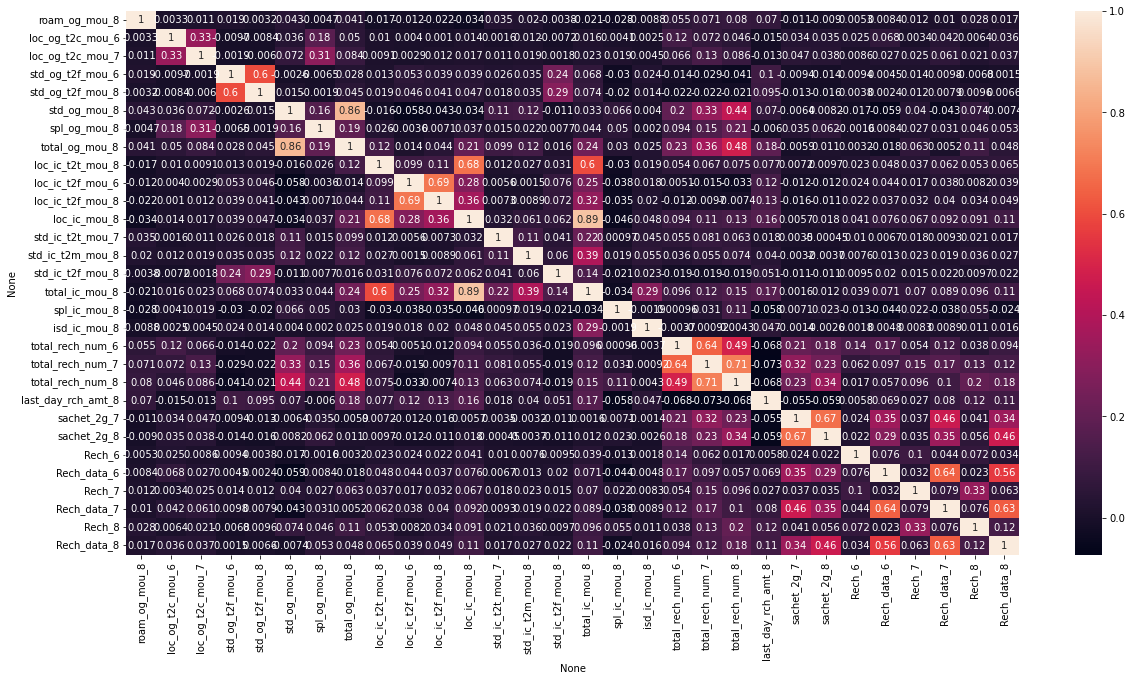

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(X_test__rfe.corr(), annot=True)

Since we dropped three more columns while training using GLM, lets drop them here also

In [76]:
X_test__glm = X_test__rfe.drop(['Rech_data_7', 'std_og_t2f_mou_6', 'sachet_2g_7'], axis=1)
X_test__glm

,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_8,...,total_rech_num_6,total_rech_num_7,total_rech_num_8,last_day_rch_amt_8,sachet_2g_8,Rech_6,Rech_data_6,Rech_7,Rech_8,Rech_data_8
0,-0.156121,-0.232765,-0.206943,-0.126557,-0.331506,-0.268724,-0.512406,-0.181087,-0.278564,-0.284557,...,-0.354669,-0.377391,-0.440954,-0.573204,-0.27778,0.130981,-0.581713,0.134492,0.200644,-0.599015
1,-0.156121,-0.232765,-0.206943,-0.126557,-0.358237,-0.270417,0.234806,-0.337011,-0.248584,-0.284557,...,-0.354669,-0.517911,-0.302501,-0.573204,-0.27778,0.130981,-0.581713,0.134492,0.200644,-0.599015
2,0.706103,-0.232765,-0.206943,-0.126557,-0.401997,-0.270417,-0.633456,-0.358021,-0.284901,-0.284557,...,-0.215080,0.184691,-0.302501,-0.573204,-0.27778,0.130981,-0.581713,0.134492,0.200644,-0.599015
3,-0.156121,-0.232765,0.753380,-0.126557,-0.401997,-0.205507,-0.583294,-0.172554,-0.284901,-0.242789,...,-0.633849,-0.377391,-0.717860,-0.573204,-0.27778,0.130981,-0.581713,0.134492,0.200644,-0.599015
4,-0.156121,-0.232765,-0.206943,-0.126557,1.452570,0.009544,0.995681,-0.278248,-0.284901,-0.284557,...,0.482869,-0.096350,0.112858,0.609656,-0.27778,0.130981,-0.581713,0.134492,0.200644,-0.599015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.156121,-0.232765,0.054115,-0.126557,-0.327719,-0.270417,0.426576,1.905899,-0.167663,-0.011287,...,0.064100,-0.236871,-0.440954,1.428559,-0.27778,0.130981,1.719062,0.134492,0.200644,-0.599015
29996,-0.156121,-0.232765,-0.178973,-0.126557,1.612313,-0.270417,1.121557,-0.245405,-0.207879,0.206463,...,-0.633849,-0.658432,-0.440954,-0.573204,-0.27778,0.130981,-0.581713,0.134492,0.200644,-0.599015
29997,0.090636,-0.232765,-0.206943,-0.126557,-0.364029,-0.177285,-0.529747,-0.273981,-0.187893,-0.284557,...,-0.354669,-0.798952,0.251311,-0.118258,-0.27778,0.130981,-0.581713,0.134492,0.200644,-0.599015
29998,-0.156121,1.715912,0.287204,-0.126557,0.350087,-0.158094,0.061483,-0.358021,-0.284901,-0.284557,...,5.926866,3.416660,1.220481,-0.300237,-0.27778,0.130981,-0.581713,0.134492,0.200644,-0.599015


Now, lets apply PCA

In [77]:
#PCA data
X_test__pca = X_test__glm

In [78]:
#Tranforming test data using IncreamentalPCA
X_test__ipca10 = ipca10.transform(X_test__pca)
y_pred__ = model_pca.predict(X_test__ipca10)

In [80]:
test_df = pd.DataFrame({'churn_probability':y_pred__})
test_df

,churn_probability
0,0
1,0
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,0
29998,0


In [82]:
test_df['id'] = churn_test['id']

In [85]:
test_df = test_df[['id', 'churn_probability']]
test_df

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


In [86]:
test_df.to_csv('Submission.csv', index=False)